# Project 4


**Option 3: Numerical simulation of heat conduction**

Heat conduction can be modeled by the so-called **heat equation** (aka the diffusion equation).  Using numerical methods described in the following paper, simulate the heat equation and thus reproduce figures 2 and 3 in the paper:

[Numerical Solution to Transient Heat Flow Problems](https://aapt.scitation.org/doi/abs/10.1119/1.1987281), Kobiske, Hock

You are encouraged to explore more heat conduction problems numerically using these techniques if you wish.  You may use any other resources you wish as long as you cite them.

## Abstract

Heat diffusion is a process where heat spreads out in a material. A diffusion equation that gives the temperature at any position at any time is represented as a differential equation of space and time. This exact form equation can be simplified by first considering a one dimension representation, and then approximating over multiple length and time segments. By splitting up a segment of material, we can approximate that the slope of the temperature distribution is constant over each segment, allowing us to numerically and iteratively calculate a temperature for each segment for each step in time. Kobiske and Hock describes a numerical method to solve a simple 1D rectangular copper bar, and a 3D spherically symmetric copper sphere. Figures representing the temperature at each position for various moments in time are shown in the paper, and by following the method of numerical approximation, I am able to reproduce and match the original figures published by Kobiske and Hock. 

## Physical System and Model

In this project, I examine the heat diffusion in two different material shapes. First, I consider the temperature distribution for a rectangular copper bar, treated as a 1D object. Then I apply similar methods to find the temperature distribution of a spherically symmetric copper sphere. 

The general form for the diffusion equation is a differential equation of form

$$\alpha ^2 \nabla ^2 T = \frac{\partial T}{\partial t}$$

where $T$ represents the temperature in degrees Celsius, $t$ represents the time in seconds, and $\alpha$ is the diffusivity constant with units of $cm \cdot s ^{-1/2}$.

By considering only one dimension, we can reduce $\nabla ^2 = \frac{\partial^2 }{\partial x^2}$, so we then have 

$$\alpha ^ 2 \frac{\partial^2 T }{\partial x^2} = \frac{\partial T}{\partial t}$$

In order to calculate the temperature diffusion numerically, we split up the total length of the material into small intervals, and also do the same for time. 

For a length $L$, consider length $h$ that evenly divides $L$. Then $x = m * h$ is the length at position $m$. 

Similarly, dividing time into segments of $\Delta t$, then $t = n \Delta t$ is the time at time step $n$. 

We then write that the temperature at position $x(m)$ and time $t(n)$ is represented by $T(m, n)$. 

To further simplify the diffusion equation, we assume that the slope of the temperature distribution is constant over a small interval $x(m)$ to $x(m + 1)$. By doing so, we can reduce the differential equation into a difference equation that gives the temperature at each position iteratively in time. 

$$T(m, n+1) = T(m, n) + \beta * [T(m+1, n) + T(m-1, n) - 2 * T(m, n)]$$

Where $\beta = \frac{\alpha^2 \Delta t}{h^2}$. 



With this new equation, we can numerically and iteratively compute the temperature along a 1D segment at any point in time using the temperatures of the surrounding segment from a previous time step. 

Mimicking the calculations by Kobiske and Hock, we compute the temperature diffusion for a copper bar of length $L = 20$ $cm$, and $\alpha ^2 = 1.10407$ $cm^2 / s$. We then select $h = 1$ $cm$, and $\beta = \frac{1}{6}$ to give $\Delta t = 0.150956$ $s$. Note that we specifically choose $\beta \leq \frac{1}{2}$ to minimize error, and determine $\Delta t$ afterwords. 

We then set initial conditions such that the entire bar starts at 100ºC, and boundary conditions set so that the two ends of the bar are held constant at 0ºC. We then design a program to iteratively step through each moment in time, computing the temperature at each position. 

Note that, while choosing a smaller $h$ and $\Delta t$ would produce more accurate results, the calculations have time complexity $O(n^2)$, so it may not be feasible to do so. 

Attempting to solve the heat diffusion for a 3D object is much more complex. In spherical coordinates, the diffusion equation is 

$$\alpha ^2 [ \frac{\partial^2 T}{\partial r^2} + \frac{2}{r} \frac{\partial T}{\partial r} ] = \frac{\partial T}{\partial t}$$

Fortunately, for a sphere, we can apply the transformation 

$$T(r,t) = \frac{V(r,t)}{r}$$

Where $r$ is the radial position, and $V(r,t)$ is a transformed temperature. This transformation is great, because if $T(r,t)$ is a solution to the above differential equation, then $V(r,t)$ is a solution to 

$$\alpha ^ 2 \frac{\partial^2 V(r,t) }{\partial r^2} = \frac{\partial V(r,t)}{\partial t}$$

Which is the exact same form as the differential equation for a 1D bar. This allows us to use the same iterative numerical calculation to calculate the temperature at any point at any time.

$$V(m, n+1) = V(m, n) + \beta * [V(m+1, n) + V(m-1, n) - 2 * V(m, n)]$$

So, to solve the heat diffusion for a sphere, we can transform the initial conditions using $V(r,t) = r * T(r,t)$, apply the iterative calculations, and then transform back to temperature using $T(r,t) = \frac{V(r,t)}{r}$.

Again, mimicking the calculations by Kobiske and Hock, we consider a copper sphere with radius $R = 25$ $cm$. We then select $h = 1$ $cm$, and $\beta = \frac{1}{6}$ just like before. 

Finally, we set initial conditions such that the entire sphere starts at 100ºC, and boundary conditions set so that the outer surface of the sphere is held constant at 0ºC. We then design a program to iteratively step through each moment in time, computing the temperature at each position. 




## Algorithms

For this project, I designed two classes, `Diffusion_1D` and `Diffusion_3D`, to model a 1D bar and 3D sphere. 

In [1]:
from proj_4 import Diffusion_1D, Diffusion_3D

A class object is designed to model the actual material object. Let's consider a 1D bar using `Diffusion_1D`. We initialize a class object and set its parameters. 

```
bar = Diffusion_1D(a = (1.10407 ** 0.5), l = 20, b = 1/6, h = 1, t_max = 120)
```

`a` represents $\alpha$, and we use the diffusivity value for copper, $\alpha ^2 = 1.10407$.

`l` is the length $L$ of the object in centimeters, and we set $L = 20$ $cm$. 

`b` represents $\beta$, and we use the chosen value of $1/6$.

`h` is the length interval $h$ in centimeters, and we set $h = 1$ $cm$.

`t_max` is the total time we want to run a simulation for. When the diffusion simulation is run, the temperatures for all time segments will be computed from $t = 0$ to $t = t_{max}$. 

The next step is to set the boundary conditions. This is done with the class method `set_boundary_conditions`. For example, 

```
bar.set_boundary_conditions(temp = 100, bc_left = 0, bc_right = 0)
```

`temp` is the temperature that the object starts at. We chose an initial temperature of 100ºC. The method then creates a temperature array that will represent the temperature at each length segment. This array is initialized with values equal to `temp`. 

`bc_left` and `bc_right` represent the initial condition temperatures at position $x = 0$ and $x = L$ respectively. We set the boundary conditions to be held constant at 0ºC for both ends. These boundary conditions will be applied at each time step, holding the temperature values at the boundaries constant. 

Now we are all set up to simulate diffusion using our iterative difference equation, 

$$T(m, n+1) = T(m, n) + \beta * [T(m+1, n) + T(m-1, n) - 2 * T(m, n)]$$

This is as simple as 

```
bar.simulate_diffusion()
```

The bar object will then fill the temperature array with temperatures at each length segment for each time segment $\Delta t$. The temperature array is specifically structured and modeled to match the notation of Kobiske and Hock. That is, `temp[m, n]` represents the temperature given by $T(m, n)$.

And that is it. The calculations are complete. 

We can visualize the calculated temperature at different positions in time. Kobiske and Hock used the times $t = [0, 15.1, 30.2, 45.3, 60.4, 75.5]$ in figure 2. So, we can plot these times in a manner that matches figure 2. 

```
bar.plot_temp_at_time([0, 15.1, 30.2, 45.3, 60.4, 75.5])
```

Using the class method `plot_temp_at_time(time)`, we can pass in a list of times to be plotted. 

Alternatively, we can use `plot_animate` to display an animated plot that shows the temperature at each position animated over the entire time $t_{max}$. 

*I tried my best to try and make plot_animate use a gradient color scale to represent the temperature based on the value of its y-axis. However, doing so requires a color map with a scatter plot, which does not play as nice with the animate function.*

A few tweaks are necessary apply the spherical modifications to `Diffusion_3D`. 

The class `Diffusion_3D` inherits from `Diffusion_1D`. This class modifies the `set_boundary_conditions` method, and defines new helper methods to apply and undo the radial transformation. 

`set_boundary_conditions` is modified to only take one boundary condition, `bc_right`, which represents the boundary condition of the surface. This also sets up the temperature array to use the temperature representation $V(r,t) = r * T(r,t)$. 

`convert_temp_to_radial` is a helper method which helps convert the temperature array back into standard temperature $T(r, t)$. In the paper, Kobiske and Hock state that $T(0, t)$ is found by "making use o a three point interpolation scheme." This is necessary, because since $T(r,t) = \frac{V(r,t)}{r}$, at $r = 0$, we can't divide by zero. So, I assumed that they interpolated a best fit point at $r = 0$ using the three nearest neighbors. I did this by using the three nearest neighbors in the standard temperature representation, and calculating the best fit parabola. I then used this best fit parabola to determine $T(0, t)$. 

*I struggled a bit trying to handle converting from the standard temperature representation to the radial temperature representation. Especially with how to handle the boundary conditions when we can't divide by zero. It turns out that the solution is to keep $V(0, t) = 0$ in the radial representation, and then only determine $T(0, t)$ using a best fit when converting back to the standard representation.*

## Code

The code for the 1D bar is explained above in Algorithms. Now let's run it, using the same parameters as Kobiske and Hock. 

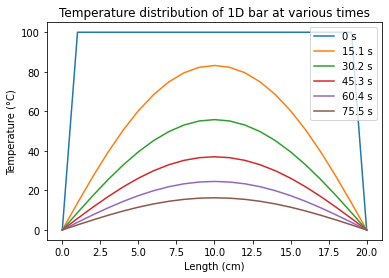

In [2]:
bar = Diffusion_1D(a = (1.10407 ** 0.5), l = 20, b = 1/6, h = 1, t_max = 120)
bar.set_boundary_conditions(temp = 100, bc_left = 0, bc_right = 0)
bar.simulate_diffusion()
bar.plot_temp_at_time([0, 15.1, 30.2, 45.3, 60.4, 75.5], object_name = "1D bar")

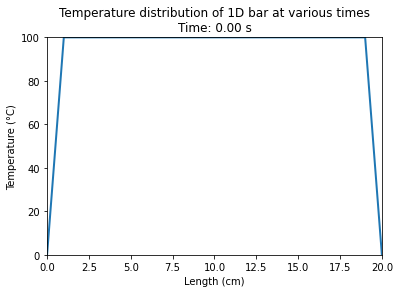

In [3]:
bar.plot_animate("1D bar")
# It appears that animations does not work in Jupyter Notebook. So sad, I worked hard on animating this... =(
# Run animate.py in something other than jupyter notebooks to see the animations. 

Now let's run the code for a copper sphere. 

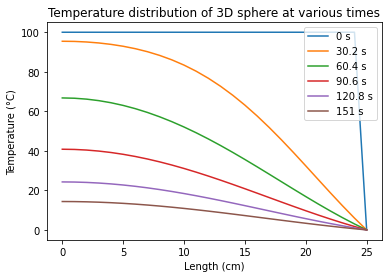

In [4]:
sphere = Diffusion_3D(a = (1.10407 ** 0.5), l = 25, b = 1/6, h = 1, t_max = 180)
sphere.set_boundary_conditions(temp = 100, bc_right = 0)
sphere.simulate_diffusion()
sphere.convert_temp_to_radial()
sphere.plot_temp_at_time([0, 30.2, 60.4, 90.6, 120.8, 151], object_name = "3D sphere")

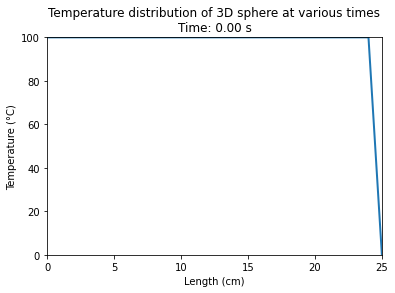

In [5]:
sphere.plot_animate("3D sphere")
# It appears that animations does not work in Jupyter Notebook. So sad, I worked hard on animating this... =(
# Run animate.py in something other than jupyter notebooks to see the animations. 

## Results

The goal of this project is to reproduce the results displayed in Figure 2 and 3 from Kobiske and Hock. 

Figure 2 is shown below. This figure shows the temperature distribution in a rectangular copper bar at various points in time. The times chosen appear to be 0 s, 15.1 s, 30.2 s, 45.3 s, 60.4 s, and 75.5 s. 

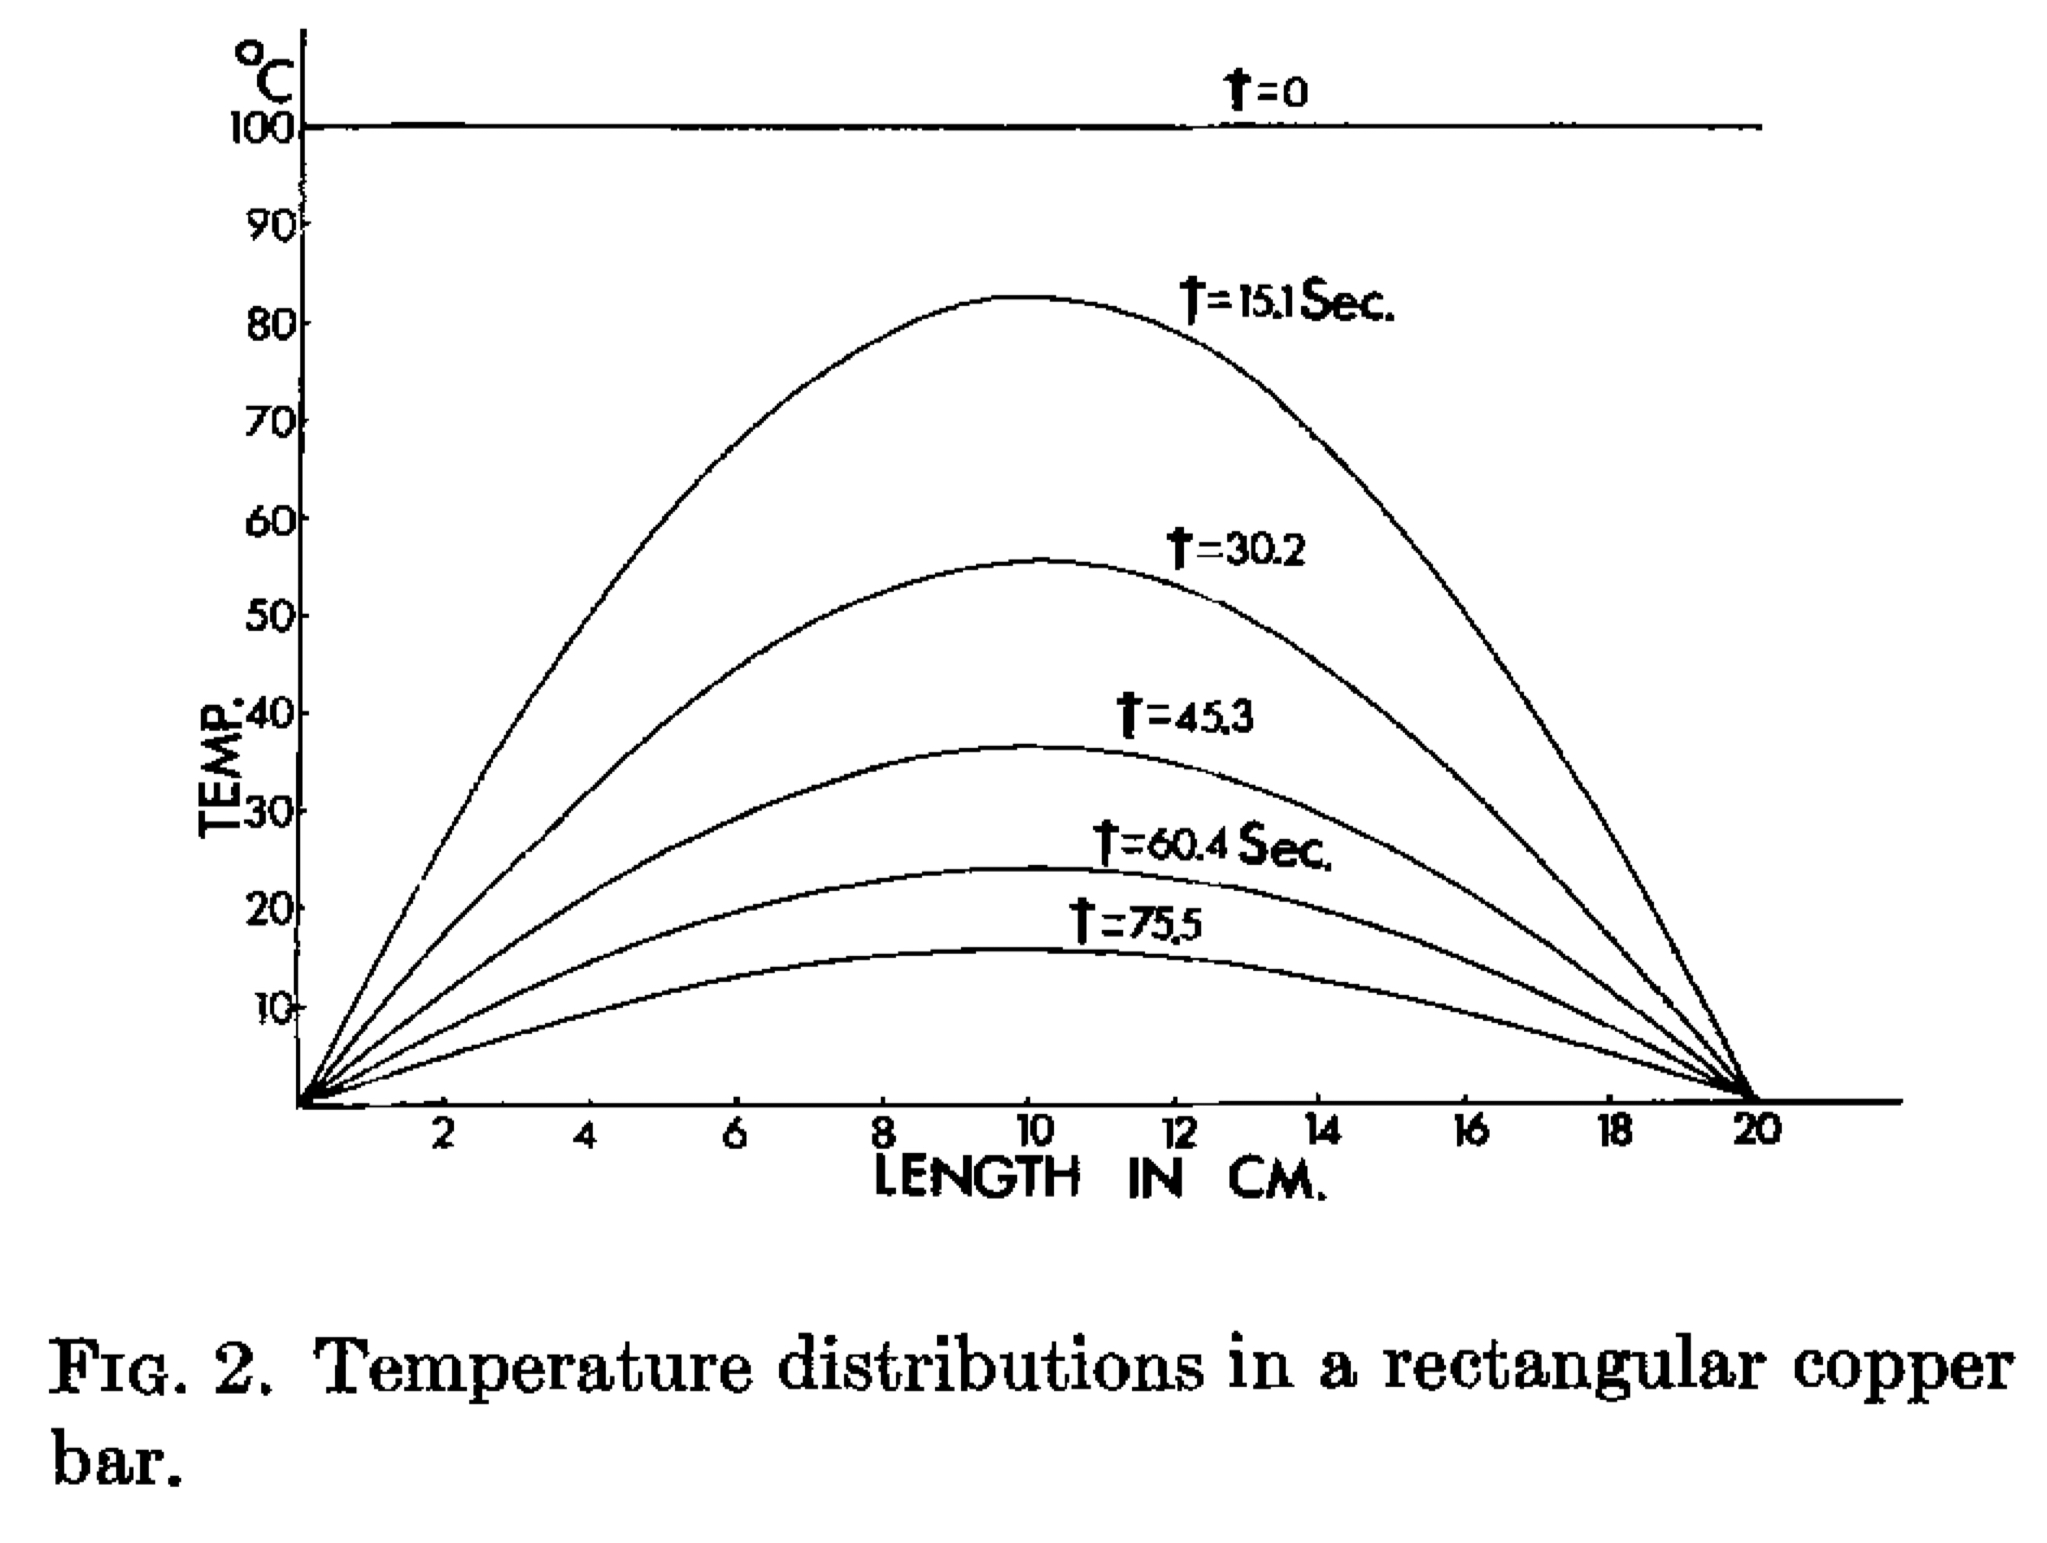

In [6]:
from IPython.display import Image
Image(filename = "fig2.jpeg", width=500)

The figure that our code produces is shown below. 

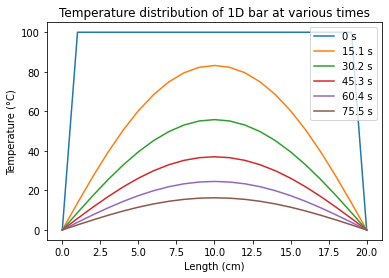

In [7]:
bar.plot_temp_at_time([0, 15.1, 30.2, 45.3, 60.4, 75.5], object_name = "1D bar")

In my code, I apply the boundary conditions at $ t = 0$ which is why it appears that there is a drop off at the ends. Other than that, it appears that the shape of the curves and temperature values match exactly. Hurray! 

Now let's compare Figure 3, which shows the temperature distribution in a copper sphere. The times chosen appear to be 0 s, 30.2 s, 60.4 s, 90.6 s, 120.8 s, and 151 s. 

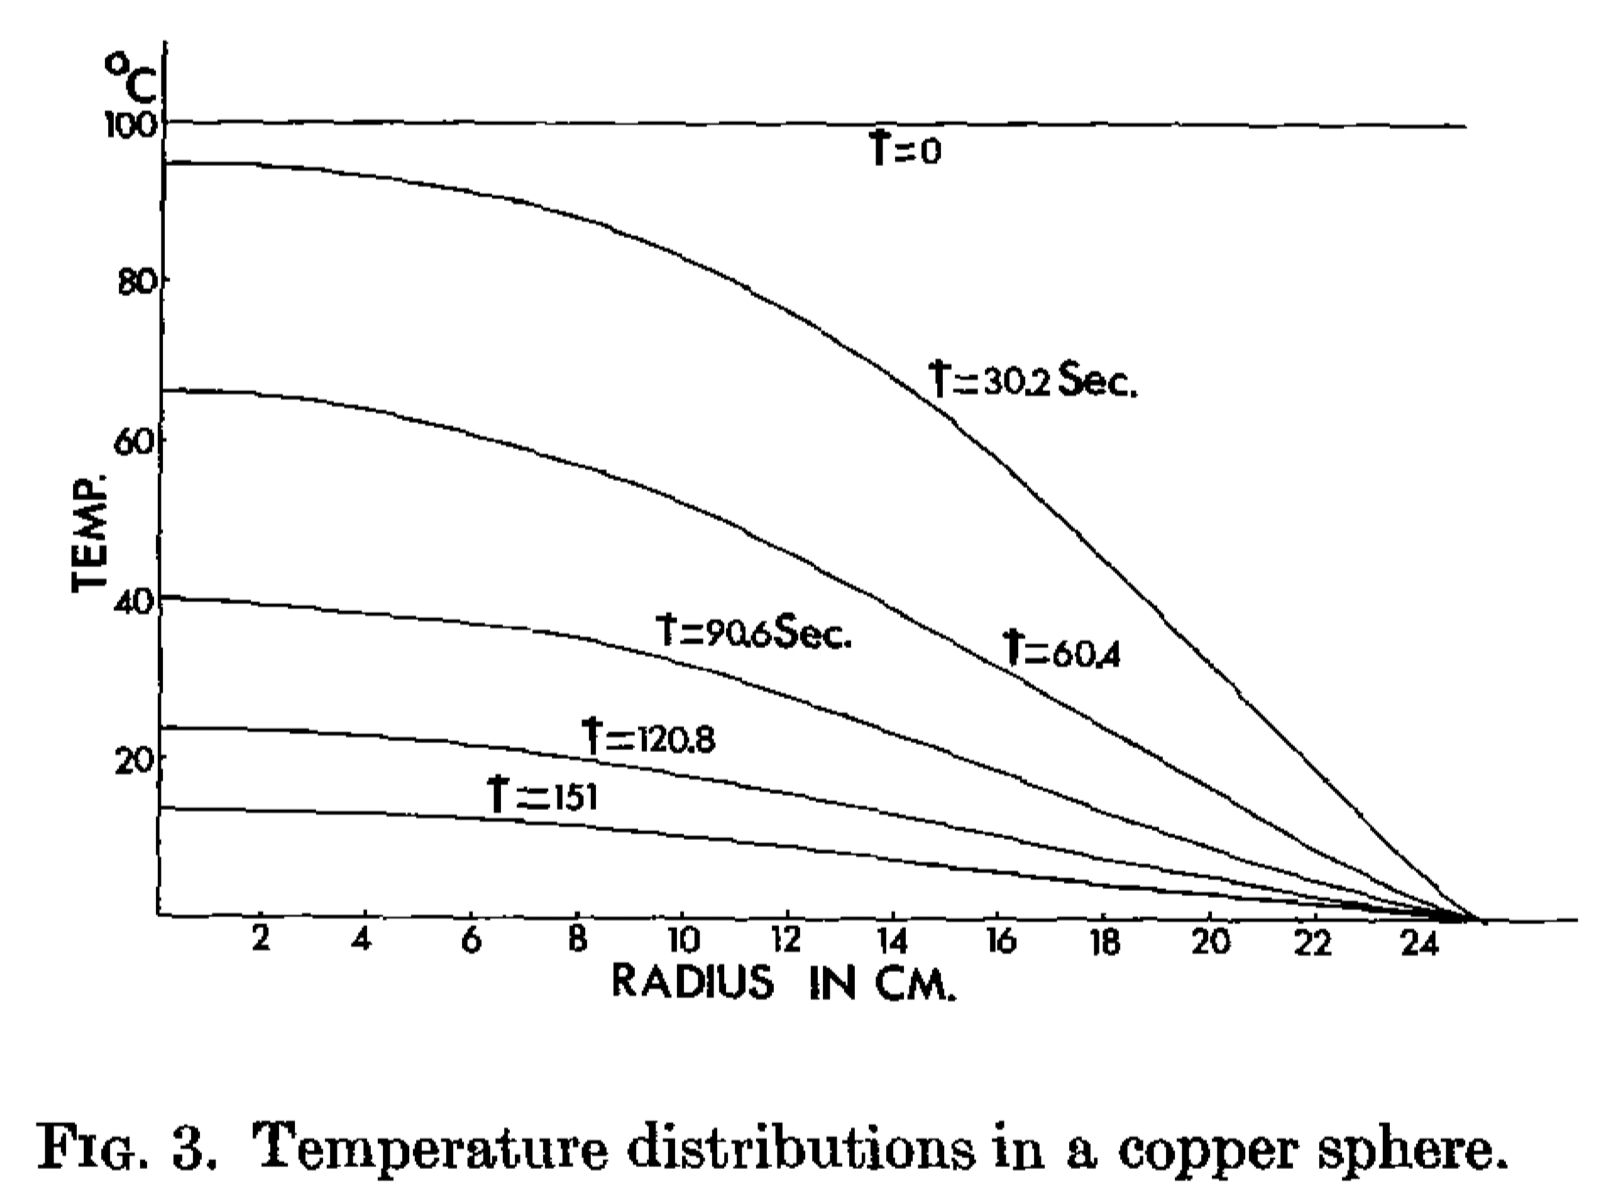

In [8]:
Image(filename = "fig3.jpeg", width=500)

The figure that our code produces is shown below. 

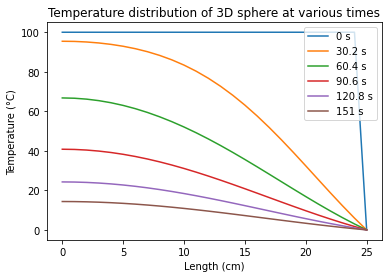

In [9]:
sphere.plot_temp_at_time([0, 30.2, 60.4, 90.6, 120.8, 151], object_name = "3D sphere")

It appears that the shape of the curves and temperature values match exactly. Hurray! 

And there it is. We have successfully implemented the numeric methods described by Kobiske and Hock in Python. I can be confident that the method is implemented properly given that the results match perfectly. 

## Further Exploration

There are a few additional things that I would like to explore. In the paper, it is mentioned that if the boundary conditions for a 1D bar are not equal, the stable equilibrium should be a linear distribution from one edge to the other. This should be simple to verify with our `Diffusion_1D` class. 

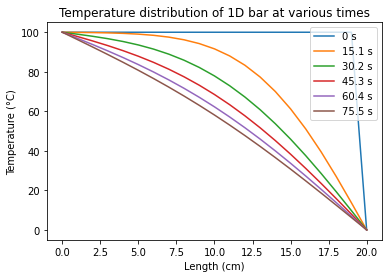

In [10]:
bar = Diffusion_1D()
bar.set_boundary_conditions(temp = 100, bc_left = 100, bc_right = 0)
bar.simulate_diffusion()
bar.plot_temp_at_time([0, 15.1, 30.2, 45.3, 60.4, 75.5], object_name = "1D bar")

That looks linear to me! So it appears that this statement checks out. 

By examining our diffusion equation 

$$T(m, n+1) = T(m, n) + \beta * [T(m+1, n) + T(m-1, n) - 2 * T(m, n)]$$

We see that $\beta = \frac{\alpha^2 \Delta t}{h^2}$ indicates how much the temperature at one location is affected by its neighbors. In other words, as the diffusivity constant $\alpha$ increases, the rate of heat diffusion should increase. 

Let's see if this is the case by comparing the heat diffusion for different materials. [This article by Jim Wilson](http://www.electronics-cooling.com/2007/08/thermal-diffusivity/) lists the diffusivity constant for various materials. 

Let's compare silver, which is known to have a high thermal conductivity, and air, which has a low thermal diffusivity. 

$\alpha_{silver}^{2} = 1.74$ $cm^2 / s$ 

$\alpha_{air}^{2} = 0.19$ $cm^2 / s$ 

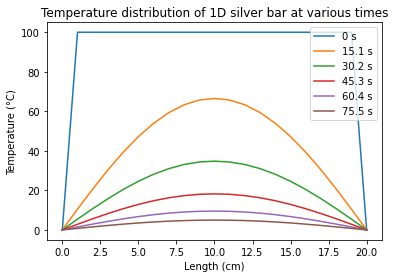

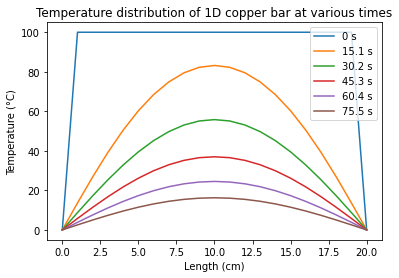

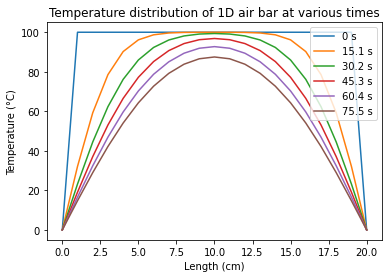

In [11]:
copper_bar = Diffusion_1D(a = (1.10407 ** 0.5))
copper_bar.set_boundary_conditions(temp = 100, bc_left = 0, bc_right = 0)
copper_bar.simulate_diffusion()

silver_bar = Diffusion_1D(a = (1.74 ** 0.5))
silver_bar.set_boundary_conditions(temp = 100, bc_left = 0, bc_right = 0)
silver_bar.simulate_diffusion()

air_bar = Diffusion_1D(a = (0.19 ** 0.5))
air_bar.set_boundary_conditions(temp = 100, bc_left = 0, bc_right = 0)
air_bar.simulate_diffusion()

silver_bar.plot_temp_at_time([0, 15.1, 30.2, 45.3, 60.4, 75.5], object_name = "1D silver bar")
copper_bar.plot_temp_at_time([0, 15.1, 30.2, 45.3, 60.4, 75.5], object_name = "1D copper bar")
air_bar.plot_temp_at_time([0, 15.1, 30.2, 45.3, 60.4, 75.5], object_name = "1D air bar")

Above, we can see the plots for the heat diffusion of silver, copper, and air, in that order. 

We can see that silver appears to be approaching equilibrium slightly faster than copper. 

Comparing the plot of air, we can see that this material would require significantly longer to reach equilibrium. 

Therefore, we can conclude that as the diffusivity constant $\alpha$ increases, the rate of heat diffusion increases.

## References

Kobiske, R., & Hock, J. (1973). Numerical Solution to Transient Heat Flow Problems.
American Journal of Physics, 41(4), 517-525.

Wilson, J. (2007). Thermal Diffusivity. Electronics Cooling. http://www.electronics-cooling.com/2007/08/thermal-diffusivity/.